# Ploting Examples

## Numpy

### $e^{-t}sin\left(t\right)$

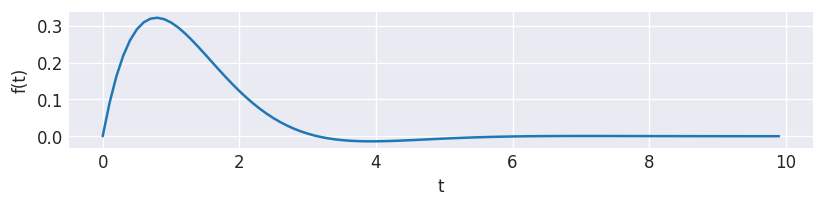

In [7]:
from matplotlib.pyplot import *
import numpy as np

t = np.arange(0, 10, 0.1)
ft = np.exp(-t)*np.sin(t)

figure(figsize=(8, 1.5), dpi=120)
style.use('seaborn-darkgrid')
plot(t, ft)
xlabel("t"); ylabel("f(t)")
show()

### Spectrum

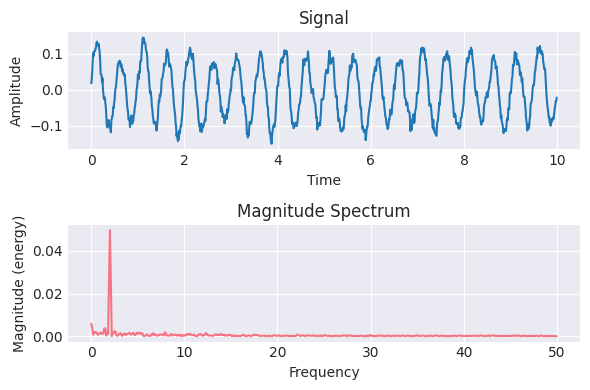

In [8]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

dt = 0.01 
Fs = 1 / dt
t = np.arange(0, 10, dt)

nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]

s = 0.1 * np.sin(4 * np.pi * t) + cnse  

fig, axs = plt.subplots(nrows=2, ncols=1)

# plot time signal:
axs[0].set_title("Signal")
axs[0].plot(t, s)
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Amplitude")

# plot different spectrum types:
axs[1].set_title("Magnitude Spectrum")
axs[1].magnitude_spectrum(s, Fs=Fs, c='#F57382')

fig.set_dpi(100)
fig.tight_layout()
plt.show()

### Spectrogram

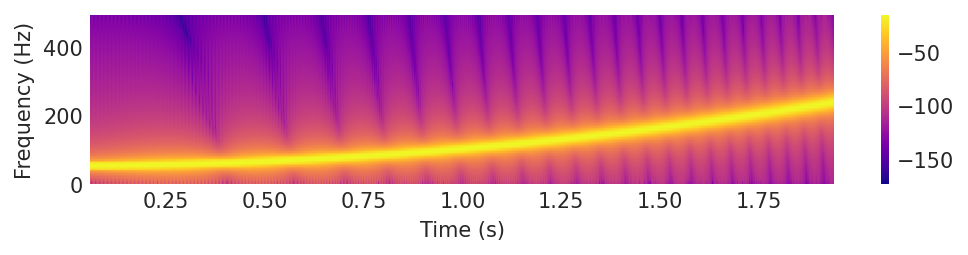

In [9]:
from numpy import arange, cos, pi, power
import matplotlib.pyplot as plt
import seaborn as sns

dt = .001
t = arange(0, 2, dt)
f0 = 50
f1 = 250
t1 = 2
fs = 1/dt

x = cos(2*pi*t*(f0 + (f1-f0)*power(t,2)/(3*t1**2)))

plt.figure(figsize=(8, 1.5), dpi=150)
sns.set_style("dark")
plt.specgram(x, NFFT=121, Fs=fs, noverlap=120, cmap='plasma')
plt.colorbar()
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

## Seaborn

### Sine-Cosine

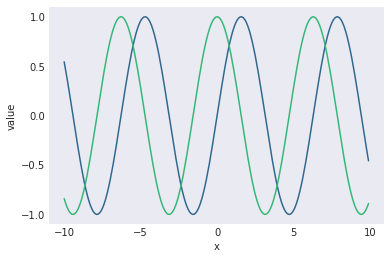

In [10]:
import pandas as pd
import seaborn as sns
from numpy import sin, cos, arange

x = arange(-10, 10, 0.1)
sine = sin(x)
cosine = cos(x)

data = pd.DataFrame()
data['x'] = x
data['sine'] = sine 
data['cosine'] = cosine

melted = data.melt(id_vars=['x'], value_vars=['sine', 'cosine'])

sns.set_style("dark")
sns.lineplot(data=melted, x='x', y='value', hue='variable', legend=False, palette='viridis');
sns.set_context("talk")

## Plotly

### Cosine

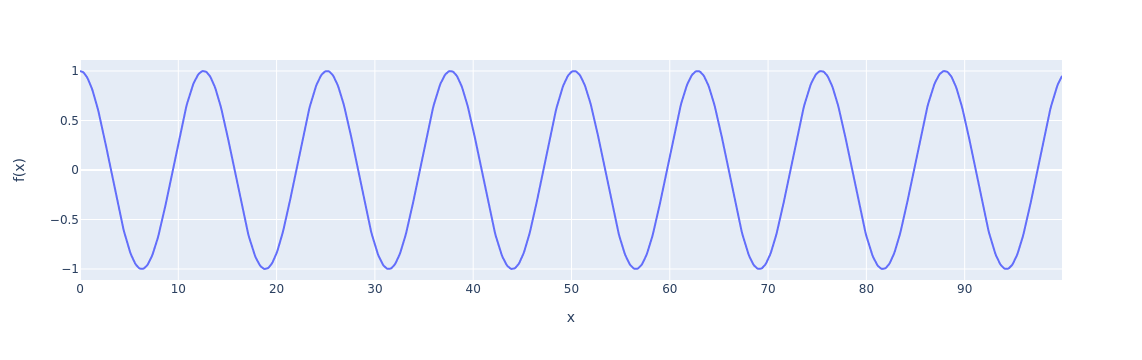

In [11]:
from numpy import arange, cos
import plotly.express as px

x = arange(0, 100, 0.1)
y = cos(.5*x)

fig = px.line(x=x, y=y, labels={'y':"f(x)"})
fig.show(config= {'displaylogo': False})

### Spectrogram

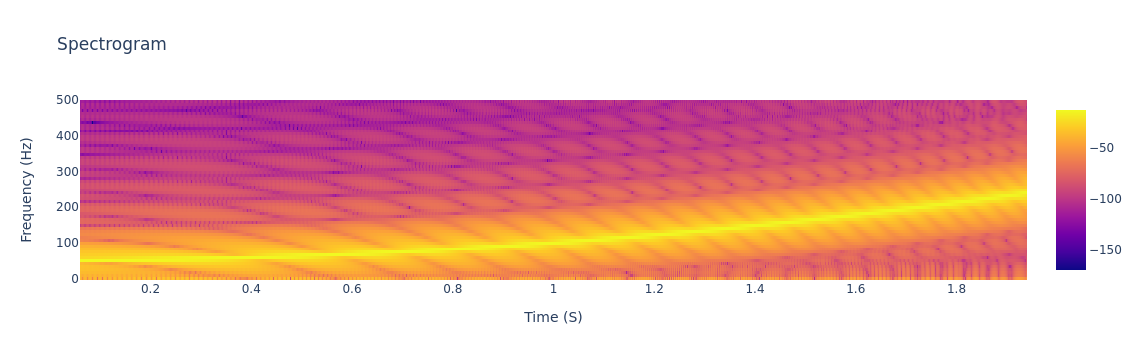

In [12]:
from scipy import signal
import numpy as np
from scipy.fft import fftshift

dt = .001
t = np.arange(0, 2, dt)
f0 = 50
f1 = 250
t1 = 2
fs = 1/dt

x = np.cos(2*np.pi*t*(f0 + (f1-f0)*np.power(t,2)/(3*t1**2)))
f, t, Sxx = signal.spectrogram(x, fs, nperseg=121, nfft=121, noverlap=120)

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Heatmap(z=10*np.log10(Sxx), x=t, y=f))
fig.update_layout(title='Spectrogram',
                   xaxis_title='Time (S)',
                   yaxis_title='Frequency (Hz)')
fig.show()
